In [1]:
import tensorflow as tf
import numpy as np
from keras import layers, models, optimizers, datasets, regularizers
from tensorflow.keras.constraints import max_norm
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 784)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 784)).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
# Define the model
simard = tf.keras.Sequential([
    # Input layer
    layers.Dense(784, input_shape=(784,), activation='sigmoid', kernel_constraint=max_norm(2)),
    # Hidden layers
    layers.Dense(800, activation='sigmoid'),
    layers.Dense(800, activation='sigmoid'),
    # Output layer
    layers.Dense(10, activation='softmax')
])

# Compile the model
simard.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(momentum=0.95),
    metrics=['accuracy']
)

In [9]:
with tf.device('/device:GPU:0'):
  history = simard.fit(
      x_train, y_train,
      validation_split=(1/6),
      epochs=43,
      batch_size=8
  )

Epoch 1/43
6250/6250 [==============================] - 28s 4ms/step - loss: 1.4531 - accuracy: 0.4647 - val_loss: 0.3707 - val_accuracy: 0.8854
Epoch 2/43
6250/6250 [==============================] - 23s 4ms/step - loss: 0.3215 - accuracy: 0.8997 - val_loss: 0.2178 - val_accuracy: 0.9325
Epoch 3/43
6250/6250 [==============================] - 24s 4ms/step - loss: 0.2188 - accuracy: 0.9327 - val_loss: 0.1656 - val_accuracy: 0.9506
Epoch 4/43
6250/6250 [==============================] - 26s 4ms/step - loss: 0.1666 - accuracy: 0.9488 - val_loss: 0.1478 - val_accuracy: 0.9562
Epoch 5/43
6250/6250 [==============================] - 24s 4ms/step - loss: 0.1361 - accuracy: 0.9584 - val_loss: 0.1328 - val_accuracy: 0.9613
Epoch 6/43
6250/6250 [==============================] - 23s 4ms/step - loss: 0.1133 - accuracy: 0.9653 - val_loss: 0.1138 - val_accuracy: 0.9670
Epoch 7/43
6250/6250 [==============================] - 26s 4ms/step - loss: 0.0981 - accuracy: 0.9694 - val_loss: 0.1061 - val_ac

In [14]:
dropout = tf.keras.Sequential([
    tf.keras.layers.Dropout(0.2, input_shape=(784,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='sigmoid'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Define the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.95)

# Compile the model
dropout.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
with tf.device('/device:GPU:0'):

  # x_train2 = x_train.reshape(-1, 28, 28)
  # x_test2 = x_test.reshape(-1, 28, 28)
  history_dropout = dropout.fit(
      x_train, y_train,
      validation_split=(1/6),
      epochs=43,
      batch_size=8
  )

Epoch 1/43
6250/6250 [==============================] - 25s 4ms/step - loss: 1.6941 - accuracy: 0.3719 - val_loss: 0.4195 - val_accuracy: 0.8709
Epoch 2/43
6250/6250 [==============================] - 24s 4ms/step - loss: 0.4803 - accuracy: 0.8476 - val_loss: 0.2515 - val_accuracy: 0.9218
Epoch 3/43
6250/6250 [==============================] - 23s 4ms/step - loss: 0.3579 - accuracy: 0.8883 - val_loss: 0.1878 - val_accuracy: 0.9420
Epoch 4/43
6250/6250 [==============================] - 23s 4ms/step - loss: 0.3013 - accuracy: 0.9064 - val_loss: 0.1714 - val_accuracy: 0.9491
Epoch 5/43
6250/6250 [==============================] - 23s 4ms/step - loss: 0.2590 - accuracy: 0.9205 - val_loss: 0.1404 - val_accuracy: 0.9578
Epoch 6/43
6250/6250 [==============================] - 23s 4ms/step - loss: 0.2330 - accuracy: 0.9281 - val_loss: 0.1334 - val_accuracy: 0.9610
Epoch 7/43
6250/6250 [==============================] - 23s 4ms/step - loss: 0.2117 - accuracy: 0.9346 - val_loss: 0.1251 - val_ac

In [21]:
test_loss_raw, test_accuracy_raw = simard.evaluate(x_test, y_test, batch_size=4)
print("Test loss:", test_loss_raw)
print("Test accuracy:", test_accuracy_raw)

2500/2500 [==============================] - 7s 3ms/step - loss: 0.1154 - accuracy: 0.9769
Test loss: 0.11537696421146393
Test accuracy: 0.9768999814987183


In [22]:
test_loss, test_accuracy = dropout.evaluate(x_test, y_test, batch_size=4)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

2500/2500 [==============================] - 7s 3ms/step - loss: 0.0517 - accuracy: 0.9830
Test loss: 0.051712315529584885
Test accuracy: 0.9829999804496765


In [23]:
# Difference in paper: 0.3
100 * (test_accuracy - test_accuracy_raw)

0.6099998950958252

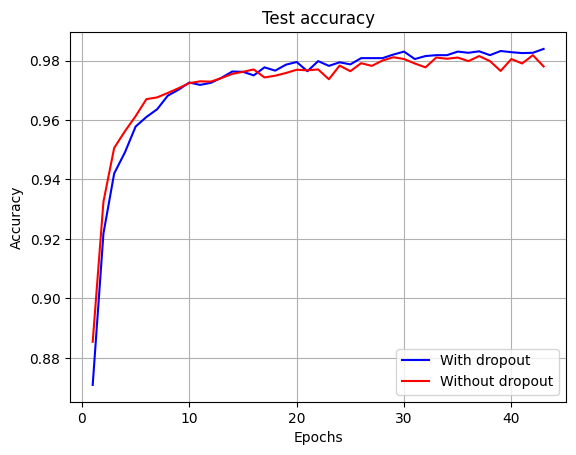

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extract validation accuracy from history object
val_acc = history_dropout.history['val_accuracy']
val_acc_raw = history.history['val_accuracy']

# Plot validation accuracy for both models
epochs = range(1, len(val_acc) + 1)
plt.plot(epochs, val_acc, 'b', label='With dropout')
plt.plot(epochs, val_acc_raw, 'r', label='Without dropout')
plt.title('Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

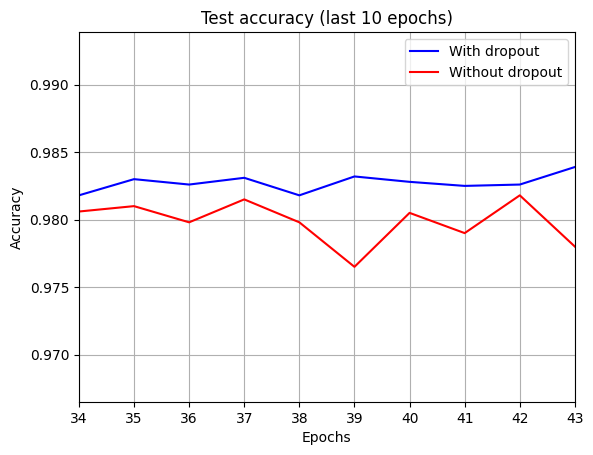

In [27]:
# Zoomed-in plot of last 10 epochs
plt.figure()
plt.plot(epochs[-10:], val_acc[-10:], 'b', label='With dropout')
plt.plot(epochs[-10:], val_acc_raw[-10:], 'r', label='Without dropout')
plt.title('Test accuracy (last 10 epochs)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(epochs[-10], epochs[-1])

# Set y-axis limits to show difference of about 2%
min_y = min(min(val_acc[-10:]), min(val_acc_raw[-10:])) - 0.01
max_y = max(max(val_acc[-10:]), max(val_acc_raw[-10:])) + 0.01
plt.ylim(min_y, max_y)
plt.grid()

plt.show()

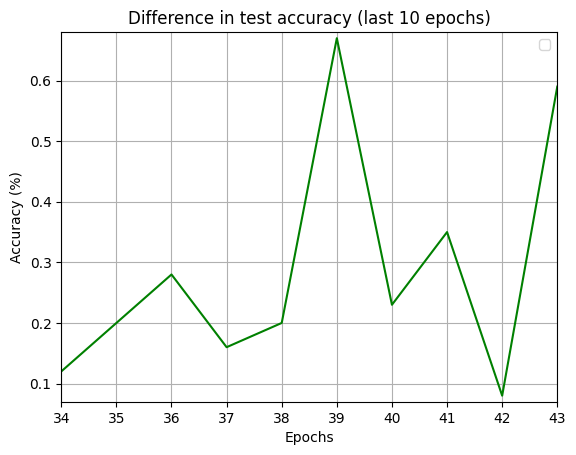

In [28]:
# Zoomed-in plot of last 10 epochs
plt.figure()
diff = 100 * (np.array(val_acc[-10:]) - np.array(val_acc_raw[-10:]))
plt.plot(epochs[-10:], diff, 'g')
plt.title('Difference in test accuracy (last 10 epochs)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.xlim(epochs[-10], epochs[-1])

# Set y-axis limits to show difference of about 2%
min_y = min(diff) - 0.01
max_y = max(diff) + 0.01
plt.ylim(min_y, max_y)
plt.grid()
plt.show()

In [30]:
print("Average difference: " + str(np.mean(diff)))

Average difference: 0.2880007028579712


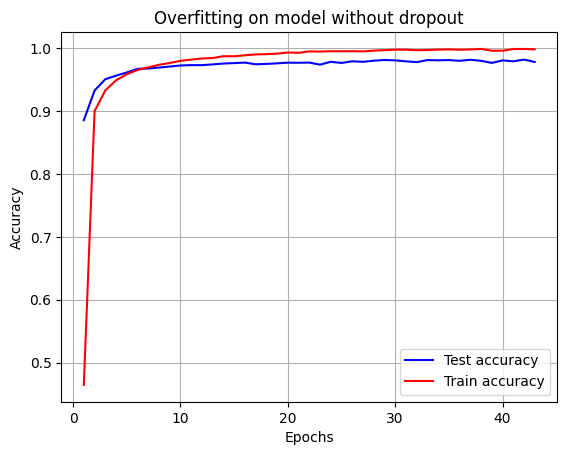

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extract validation accuracy from history object (Simard's model)
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']

# Plot validation accuracy for both models
epochs = range(1, len(val_acc) + 1)
plt.plot(epochs, val_acc, 'b', label='Test accuracy')
plt.plot(epochs, acc, 'r', label='Train accuracy')
plt.title('Overfitting on model without dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

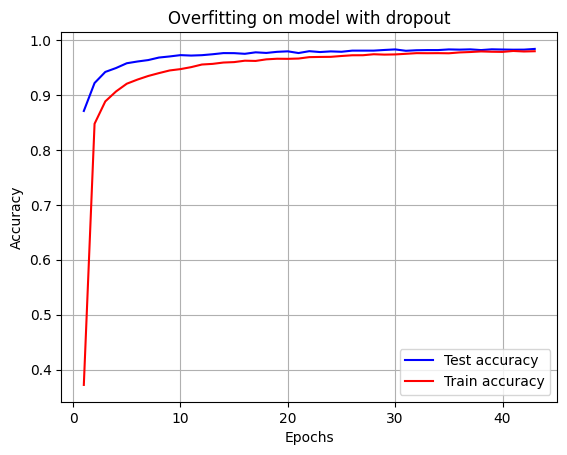

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extract validation accuracy from history object (Simard's model)
val_acc = history_dropout.history['val_accuracy']
acc = history_dropout.history['accuracy']

# Plot validation accuracy for both models
epochs = range(1, len(val_acc) + 1)
plt.plot(epochs, val_acc, 'b', label='Test accuracy')
plt.plot(epochs, acc, 'r', label='Train accuracy')
plt.title('Overfitting on model with dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()